In [3]:
#checking if runtime set in gpy
import os

if'COLAB_GPU' in os.environ:
  print('GPU')
else:
  print('CPU')

GPU


  **Install** **yolo**

In [6]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.59
    Uninstalling ultralytics-8.3.59:
      Successfully uninstalled ultralytics-8.3.59


In [7]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


### import Dataset from Roboflow

In [9]:
%pwd

'/content'

In [10]:
#making a directry
!mkdir Roadsigndetection

In [11]:
!ls

Roadsigndetection


In [12]:
#path to store the key of dataset
path="/content/Roadsigndetection"


In [13]:
%pwd

'/content'

In [15]:
#changing directory to above path , to work on it to store the key
os.chdir(path)
%pwd

'/content/Roadsigndetection'

In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dsRUXbOfmdNcVJNMyu0d")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 7768.26it/s]


In [19]:
os.chdir("/content/Roadsigndetection/Self-Driving-Cars-6")

In [22]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

In [33]:
ls /content/Roadsigndetection/Self-Driving-Cars-6/runs/detect/train3


args.yaml                                            F1_curve.png  R_curve.png  weights/
confusion_matrix.png                                 P_curve.png   results.csv
events.out.tfevents.1736604827.5847188f6bbf.12671.0  PR_curve.png  results.png


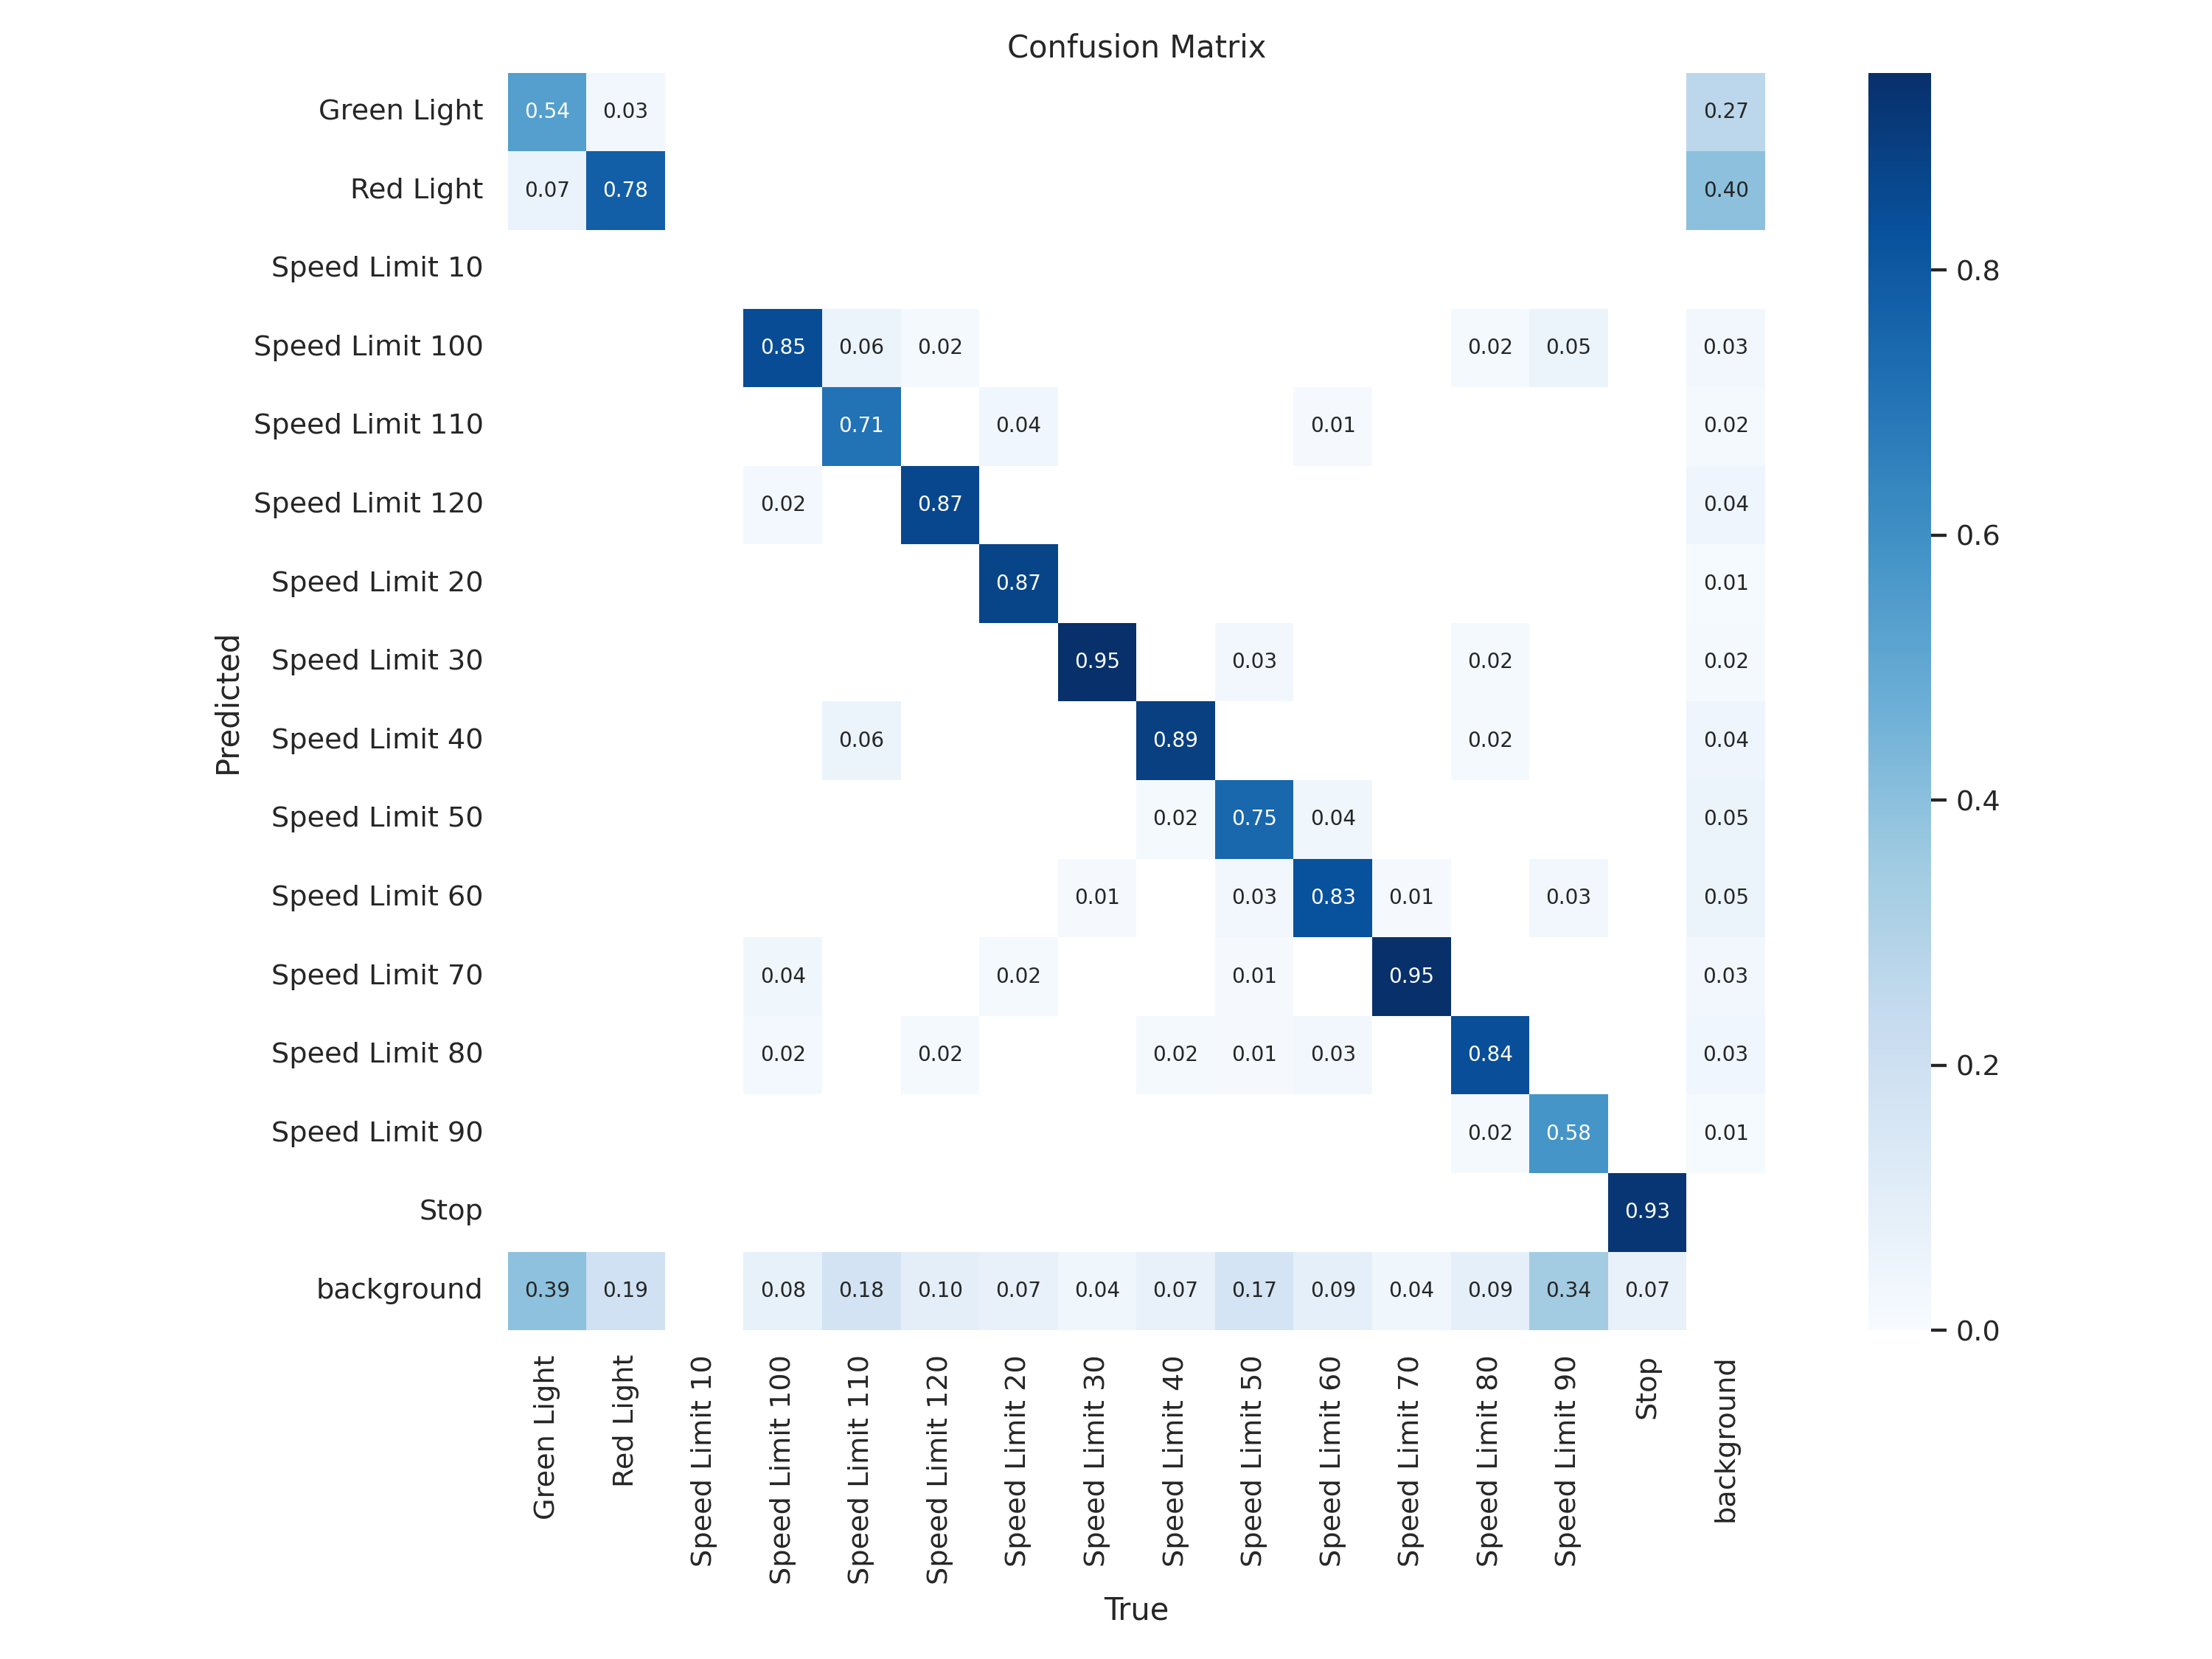

In [30]:
resultdata = "/content/Roadsigndetection/Self-Driving-Cars-6/runs/detect/train3"

from IPython.display import Image, display

# Display the confusion matrix image
display(Image(filename=f'{resultdata}/confusion_matrix.png'))


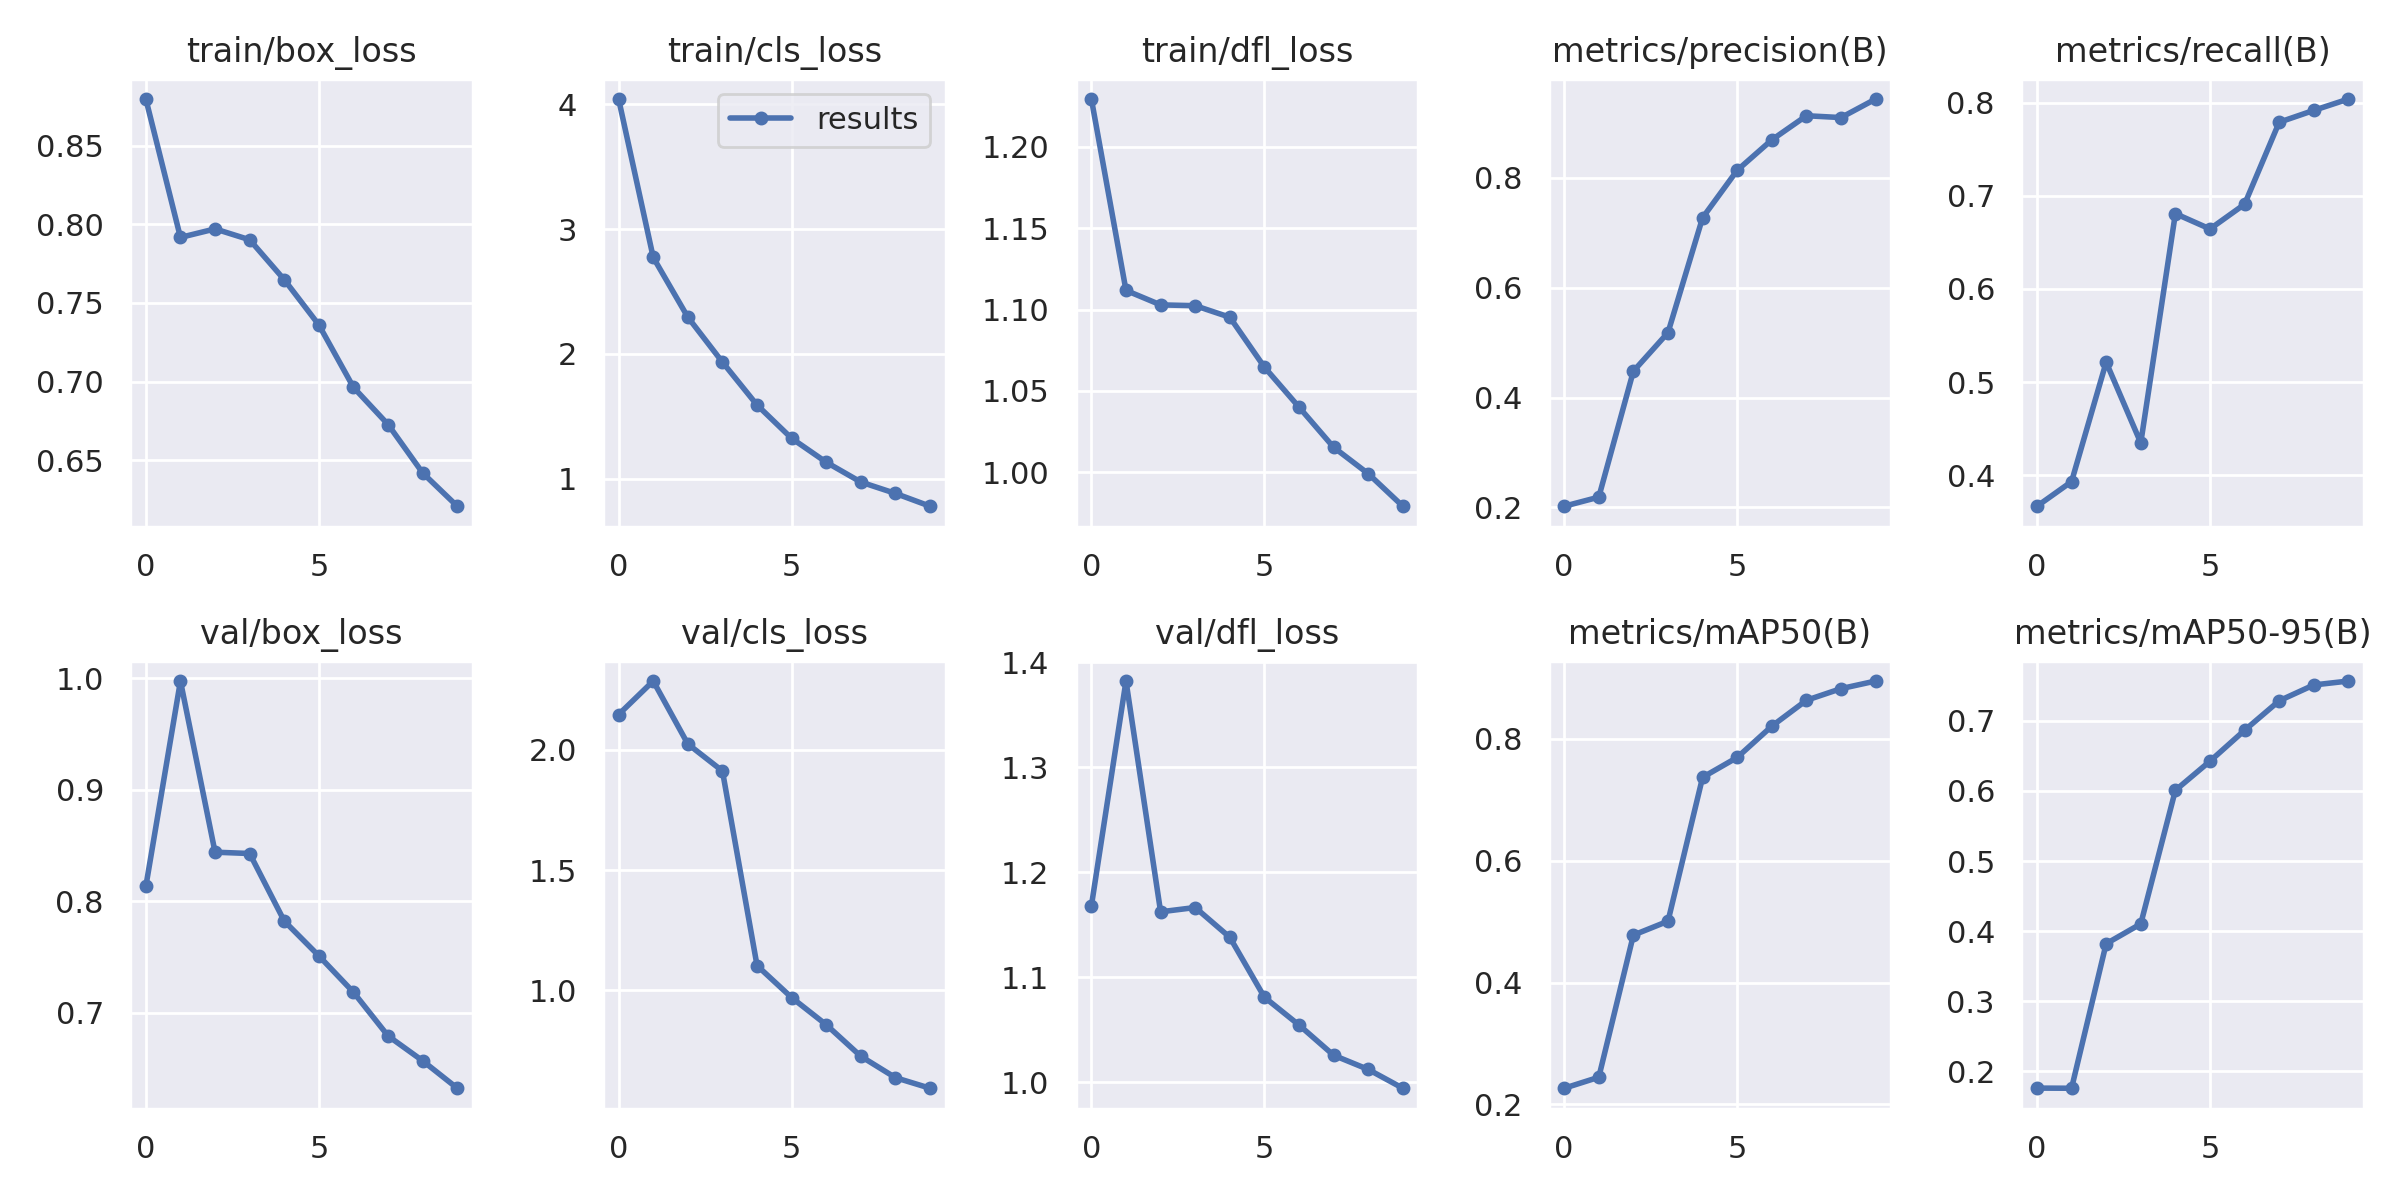

In [35]:
Image(filename=f'{resultdata}/results.png')

In [37]:
import pandas as pd

df= pd.read_csv(f'{resultdata}/results.csv')

print(df.head)

<bound method NDFrame.head of                   epoch        train/box_loss        train/cls_loss  \
0                     0               0.87981               4.04220   
1                     1               0.79171               2.77340   
2                     2               0.79713               2.29450   
3                     3               0.79022               1.93430   
4                     4               0.76481               1.59060   
5                     5               0.73600               1.32350   
6                     6               0.69626               1.13210   
7                     7               0.67260               0.97327   
8                     8               0.64176               0.88212   
9                     9               0.62059               0.77953   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0               1.22950               0.20216  ...               2.14750   
1               1.11180             

### Test Model in any video or image contining road sign

In [42]:
os.chdir('/content')

In [43]:
!mkdir Manualtestingdata
# making directry for manual data to try

mkdir: cannot create directory ‘Manualtestingdata’: File exists


In [44]:
os.chdir("/content/Manualtestingdata")
# changing to manualtesting directory as we have to save input in ti

# to import a video/data to test your model from drive
url ="url of your data you want to save for test"
id= 'id in your url'

!wget --no--check-certificate 'your url' -O inputvideo.mp4


# if you want to go to work in  selfdrivingcar directory:- os.chdir("/content/Roadsigndetection/Self-Driving-Cars-6")

wget: unrecognized option '--no--check-certificate'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [39]:
weightpath = "/content/Roadsigndetection/Self-Driving-Cars-6/runs/detect/train3/weights/best.pt"

!yolo task=detect mode=predict model={weightpath}/best.pt conf=0.25 source="path of your video" save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 330, in torch_safe_load
    file = attempt_download(weight)  # search online if missing locally
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/downloads.py", line 92, in 

In [45]:
# to download the output file
from google.colab import files

files.download('path of your video')